# 災害データ分析
## 世界の自然災害による死者数の推移
自然災害（洪水、地震、干ばつ、暴風雨、地滑り、火山噴火など）が世界でどれだけの死亡者を出してきたのかを長期的に分析する。



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


### データの可視化
最初のグラフが年ごとの死者数の推移、
二つ目のグラフが災害種類別の死者数、三つ目のグラフが年度別の災害発生件数となっている



findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

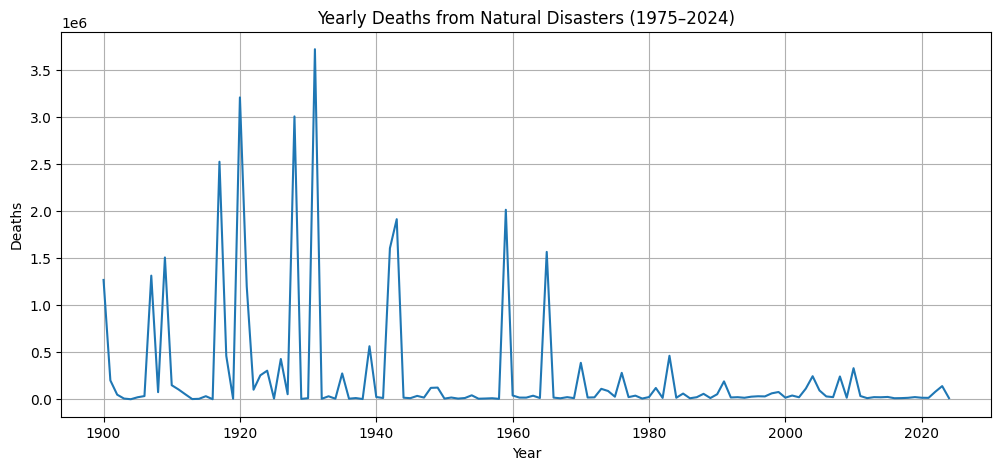

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

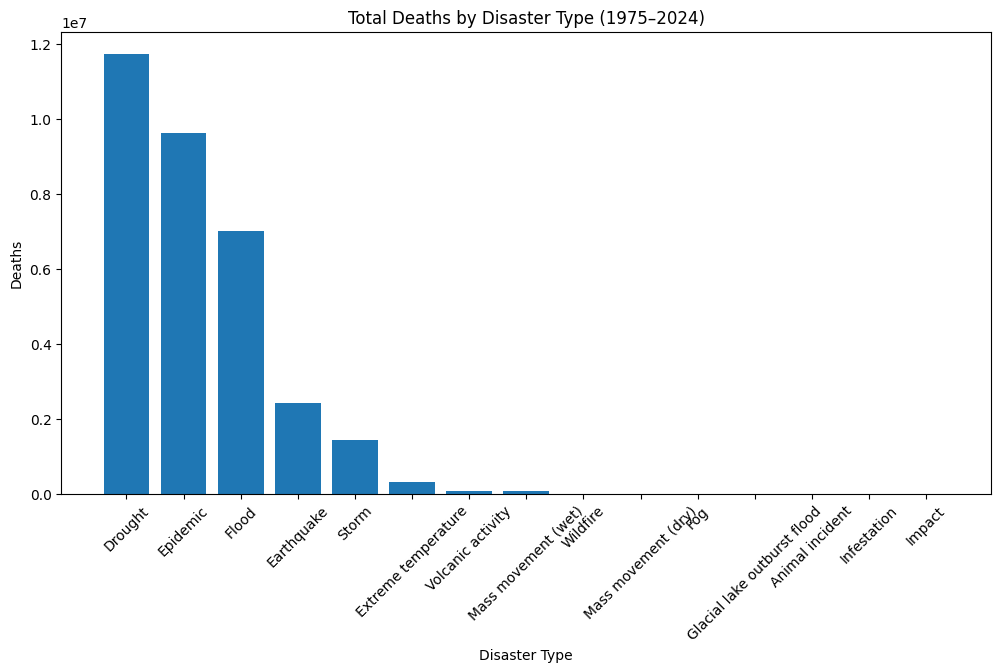

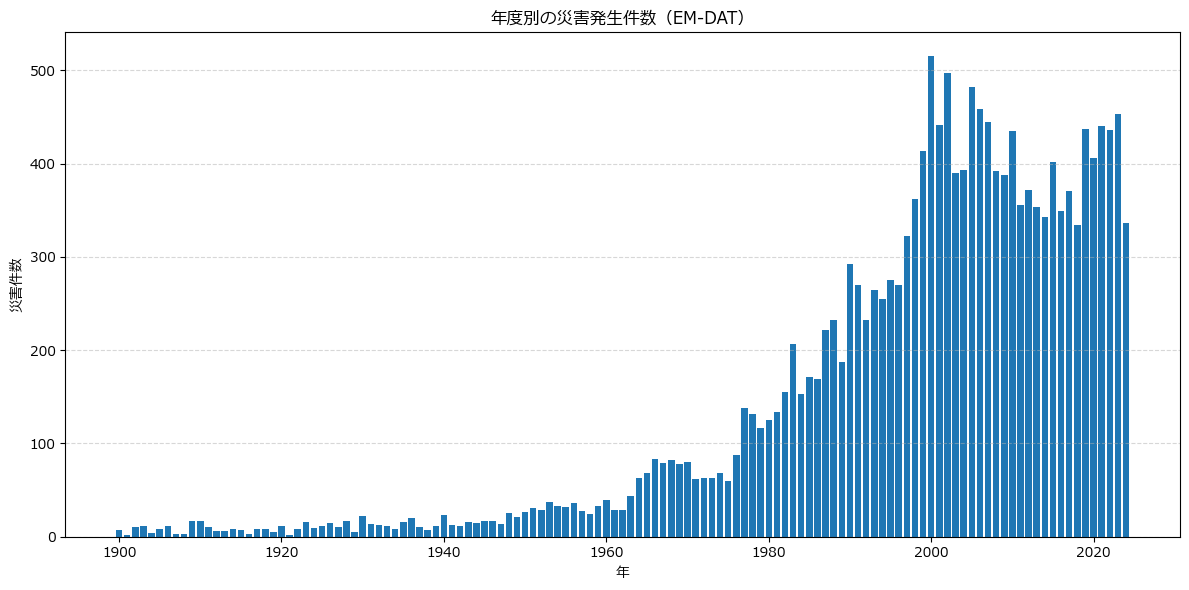

In [22]:
df = pd.read_csv("emdat.csv")

df['Total Deaths'] = df['Total Deaths'].fillna(0)

yearly_deaths = df.groupby('Start Year')['Total Deaths'].sum()

plt.figure(figsize=(12,5))
plt.plot(yearly_deaths.index, yearly_deaths.values)
plt.title("Yearly Deaths from Natural Disasters (1975–2024)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()

type_deaths = df.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(type_deaths.index, type_deaths.values)
plt.title("Total Deaths by Disaster Type (1975–2024)")
plt.xlabel("Disaster Type")
plt.ylabel("Deaths")
plt.xticks(rotation=45)
from matplotlib import font_manager

plt.rcParams['font.family'] = 'Meiryo'  

year_counts = df["Start Year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)

plt.xlabel("年")
plt.ylabel("災害件数")
plt.title("年度別の災害発生件数（EM-DAT）")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

## グラフからの分析、洞察
年ごとの死者数の推移、災害種類別の死者数、年度別災害発生件数を見てみると、災害のデータが多いからってものあるかもしれないが、災害発生件数に対し、年々死亡者数が減っていることから昔から現代にかけて早期警報システムの発達、医療・交通インフラの向上、避難体制の整備が寄与などの災害対策が整ってきたということを示していると考えられる。また、干ばつや地震、津波などが死亡者数の多い原因として大半を占めているということを示している。

### 地図に災害の記録をプロット

In [21]:
import folium
from folium.plugins import MarkerCluster


df = pd.read_csv("emdat.csv")

df = df.dropna(subset=["Latitude", "Longitude", "Disaster Type", "Total Deaths"])

disaster_types = df["Disaster Type"].unique()
colors = [
    "red", "blue", "green", "purple", "orange", 
    "darkred", "lightred", "beige", "darkblue",
    "darkgreen", "cadetblue", "pink", "gray"
]
color_map = {t: colors[i % len(colors)] for i, t in enumerate(disaster_types)}

m = folium.Map(location=[20, 0], zoom_start=2)

cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():

    deaths = row["Total Deaths"]
    radius = max(3, min(deaths ** 0.5 * 2, 50))

    popup_text = f"""
    <b>Country:</b> {row['Country']}<br>
    <b>ISO:</b> {row['ISO']}<br>
    <b>Region:</b> {row['Region']} / {row['Subregion']}<br>
    <b>Disaster Subgroup:</b> {row['Disaster Subgroup']}<br>
    <b>Disaster Type:</b> {row['Disaster Type']}<br>
    <b>Disaster Subtype:</b> {row['Disaster Subtype']}<br>
    <b>Year:</b> {row['Start Year']}<br>
    <b>Total Deaths:</b> {row['Total Deaths']} 人
    """

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=radius,
        color=color_map[row["Disaster Type"]],
        fill=True,
        fill_color=color_map[row["Disaster Type"]],
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=350)
    ).add_to(cluster)

m.save("emdat_map_strong.html")


## 地図について
EM-DAT の災害データを用いて、各災害の 発生地点（緯度経度）を世界地図上にプロットした。
地図上のマーカーをクリックすると、以下の 11 項目すべてがポップアップで確認できるようにした：
Disaster Subgroup、、Disaster Type、Disaster Subtype、ISO、Country、Subregion、Region、Latitude、Longitude、Start Year、Total Deaths
さらに、災害タイプによる色分けと 死者数に応じた円のサイズ調整を行い、視覚的に災害の種類と被害規模が理解できるようにプロットした。

## まとめ
### 1,自分が行ったこと
EM-DAT（国際災害データベース）の公開データを用いて、まず、災害ごとに含まれる Disaster Subgroup, Disaster Type, Disaster Subtype, ISO, Country, Subregion, Region, Latitude, Longitude, Start Year, Total Deaths の 11 項目すべてを地図上に可視化するマップを作成。また、時間軸での傾向を調べるため、世界の災害死者数の 50 年間推移グラフ,年度別の災害件数を集計したグラフを作成。

### 2,感想、学んだこと
データを地図とグラフの両方で可視化することで、単に数値を見るだけでは気づけなかったパターンを発見することができたのでいろんな角度からデータを見ることの大切さを学んだ。また、災害データは単に件数だけでなく、「どの地域に」「どの種類の災害が」「どれほどの規模で」発生しているかを多面的に見る必要があること、可視化する方法を変えるだけで同じデータでもまったく違う理解が得られるということを学ぶことができたと思う。